# All-DRAM

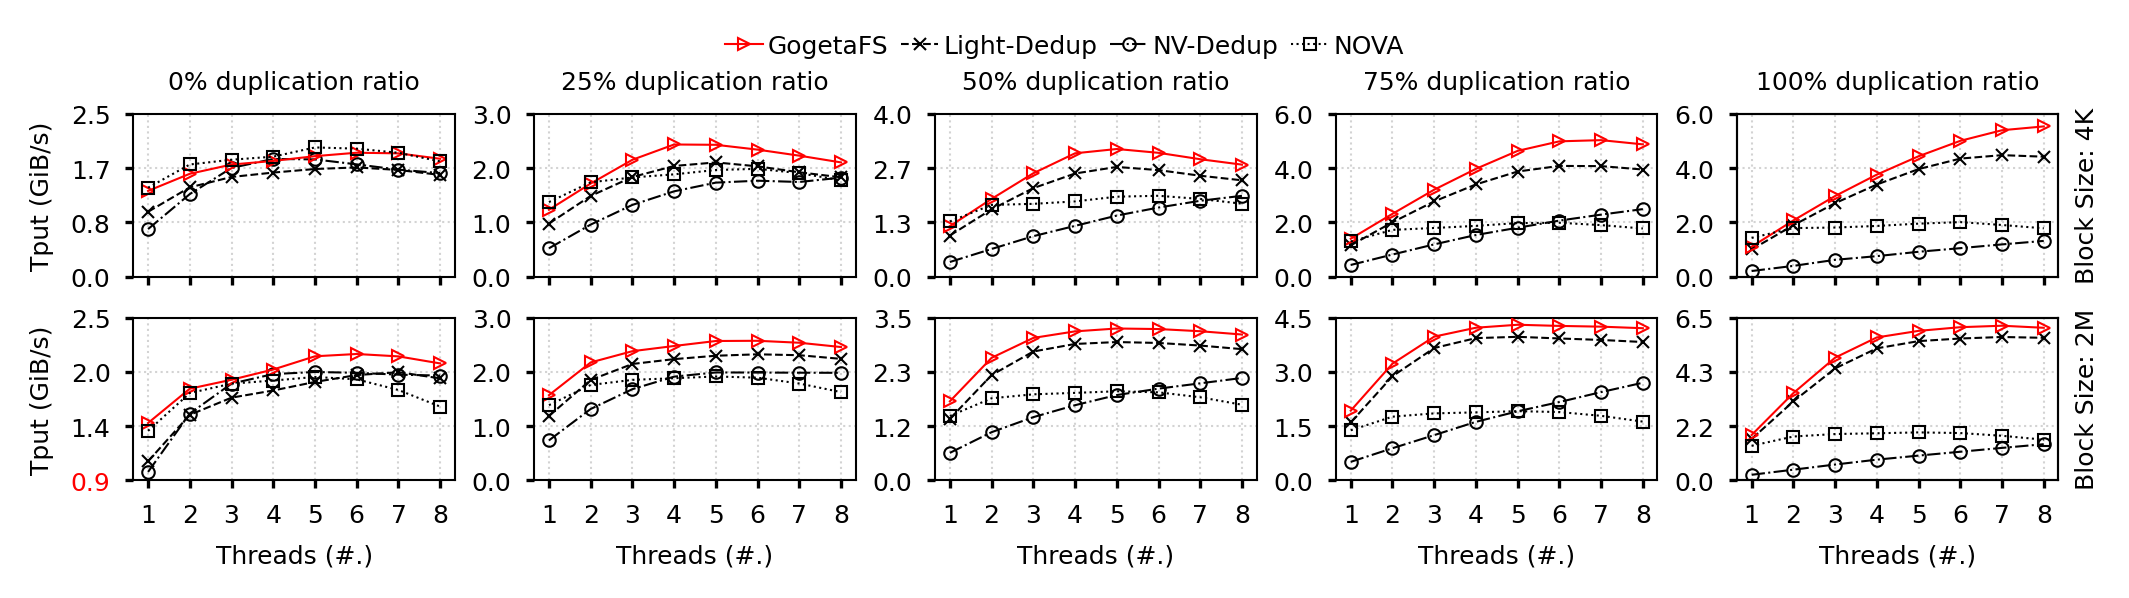

In [2]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
# matplotlib style settings
plt.rcParams.update(plt.rcParamsDefault)
matplotlib.rcParams['text.usetex'] = False
%matplotlib inline
style.use('grayscale')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["grid.color"] = "lightgray"
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-4K-all-dram", "r") as f:
    df_4K = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-continuous-all-dram", "r") as f:
    df_cont = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(4.5)))
fig.patch.set_facecolor('white')
df = df_4K
# df.drop(df[df['file_system'] == "PMM"].index, inplace=True)
# Plotting Settings
line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"]
# subtitles = ["(a) SW", "(b) RW", "(c) SR", "(d) RR", "(e) Strict-SW", "(f) Strict-RW"]

# "Light-Dedup-J-Log", "Light-Dedup-J", 

fss = ["Light-Dedup-J-64bits", "Light-Dedup-Improve", "NV-Dedup", "NOVA-Improve"]
dup_rates = [0, 25, 50, 75, 100]
jobs = [1, 2, 3 ,4 , 5, 6 ,7 ,8]

context = ""
axes = []
lines = []
cmap = "tab10"

ylims = [
    [0, 2.5],
    [0, 3],
    [0, 4],
    [0, 6],
    [0, 6],
    
    [0.9, 2.5],
    [0, 3],
    [0, 3.5],
    [0, 4.5],
    [0, 6.5],
]

for i in [0, 1]:
    for dup_idx, dup_rate in enumerate(dup_rates):
        subfig = plt.subplot(2, 5, i * 5 + dup_idx + 1)
        df = df_4K if i == 0 else df_cont
        # subfig = plt.subplot(gs0[op_idx])
        for idx, fs in enumerate(fss):
            # if fs == "":
            #     line = plt.plot(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024,  linewidth=line_width,label=fs, color="red", markerfacecolor="red", marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], zorder=10)
            # else:
            if fs == "NOVA-Improve":
                line = plt.plot(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024,  linewidth=line_width,label=fs, color="k", markerfacecolor="none", marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], zorder=10)
            elif fs == "Light-Dedup-J-64bits":
                line = plt.plot(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024,  linewidth=line_width,label=fs, color="red", markerfacecolor="none", marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], zorder=10)
            else:
                line = plt.plot(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024,  linewidth=line_width,label=fs, markerfacecolor="none", marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], color="k")
                
            lines.append(line)
        ax = fig.gca()
        lw = 0.5
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(lw)
        if (5 * i + dup_idx + 1) > 5:
            plt.xticks(jobs, fontsize=6)
            plt.xlabel("Threads (#.)", fontsize=6)
        else:
            subfig.set_title(f"{dup_rate}% duplication ratio", fontsize=6)
            plt.xticks(jobs, labels=[], fontsize=6)

        plt.tick_params(axis='both', which='major', length=2) 
        # axes.append(ax)

        if ((5 * i + dup_idx + 1) in [1, 6]):
            plt.ylabel('Tput (GiB/s)', fontsize=6)
        
        ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
        plt.ylim(ylims[5 * i + dup_idx])
        yticks = np.linspace(ylims[5 * i + dup_idx][0], ylims[5 * i + dup_idx][1], 4)
        if (ylims[5 * i + dup_idx][0] != 0):
            ax.get_yticklabels()[0].set_color("red")
        plt.yticks(yticks, fontsize=6)
        if ((5 * i + dup_idx + 1) in [5, 10]):
            ax2 = ax.twinx()
            ax2.set_ylabel("Block Size: 4K" if i == 0 else "Block Size: 2M", fontsize=6)
            ax2.set_yticks([])
            for axis in ['top','bottom','left','right']:
                ax2.spines[axis].set_linewidth(lw)
        
fss = pd.Series(fss)
fss.replace("Light-Dedup-J-64bits", "GogetaFS", inplace=True)
fss.replace("Light-Dedup-J-Log", "FDM-Log", inplace=True)
fss.replace("Light-Dedup-J", "FDM-32", inplace=True)
fss.replace("Light-Dedup-Improve", "Light-Dedup", inplace=True)
fss.replace("NOVA-Improve", "NOVA", inplace=True)
# "Light-Dedup-J-64bits", "Light-Dedup-J-Log", "Light-Dedup-Improve", "NV-Dedup", "DeNOVA", "NOVA-Improve"

handles, labels = ax.get_legend_handles_labels()

# steps = [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
# cols = [2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0]
# for ax_id, ax in enumerate(fig.axes):
#     if steps[ax_id] == 0:
#         continue
#     start = sum(steps[:ax_id])
#     end = start + steps[ax_id]
    
# leg = 
fig.legend(handles, fss, loc='upper center', bbox_to_anchor=(0,0,1,1.05), ncol=4, fontsize=6, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

# ax.legend(handles, fss, loc='upper center', bbox_to_anchor=(0,0,1,1), ncol=6, fontsize=5, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=6)
plt.tight_layout(pad=0.4)
# adjust_explanation(fig, axes, context, [1, 1, 1, 1, 0, 0])
# gs0.tight_layout(fig)
plt.savefig("./FIG-IO-ALL-DRAM.pdf", bbox_inches='tight', pad_inches=0)


## All-PM-Embedded

<Figure size 1051.18x472.441 with 0 Axes>

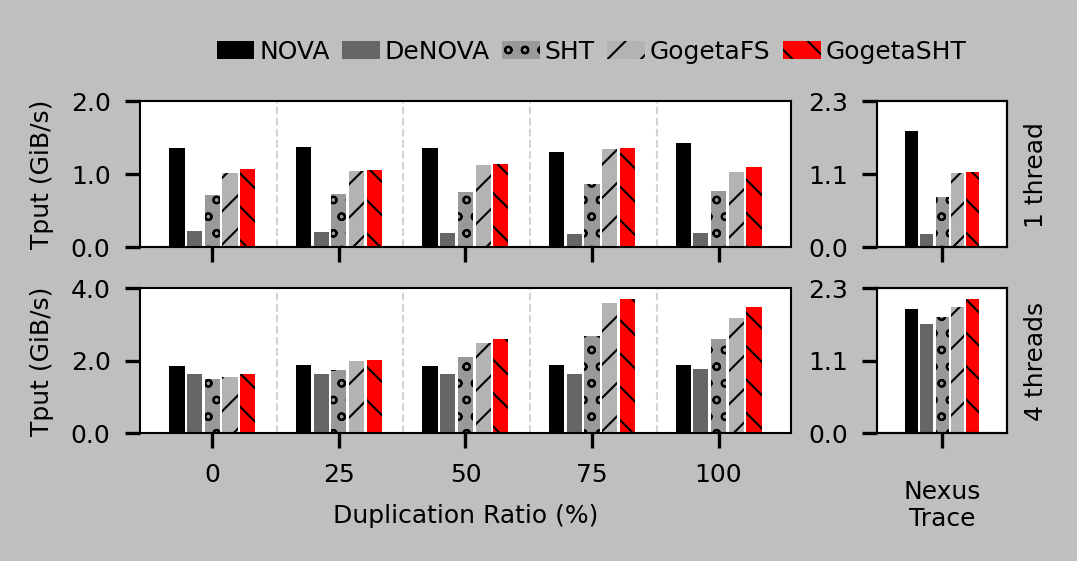

In [18]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
# matplotlib style settings
plt.rcParams.update(plt.rcParamsDefault)
matplotlib.rcParams['text.usetex'] = False
%matplotlib inline
style.use('grayscale')
plt.rcParams["axes.grid"] = False
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["grid.color"] = "lightgray"
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-4K-all-pm", "r") as f:
    df_4K_hybrid = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("../FIG_RealWorld/performance-comparison-table-trace-all-pm", "r") as f:
    df_trace = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
fig.patch.set_facecolor('white')
df = df_4K_hybrid
# df.drop(df[df['file_system'] == "PMM"].index, inplace=True)
# Plotting Settings
line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"]
# subtitles = ["(a) SW", "(b) RW", "(c) SR", "(d) RR", "(e) Strict-SW", "(f) Strict-RW"]
# fss = ["Light-Dedup-J-Regulate", "Light-Dedup-J-Log-Regulate", "Light-Dedup-J-PM-Table", "Light-Dedup-J-PM-Table-P"]
fss = ["NOVA-Improve", "DeNOVA", "Light-Dedup-J-PM-ALL-P", "Light-Dedup-J-Regulate", "Light-Dedup-J-PM-ALL"]
jobs = [1, 4]
dup_ratios=[0, 25, 50, 75, 100]
dup_pts=[1, 2, 3, 4, 5]

axes = []
lines = []
cmap = "tab10"

ylims = [
    [0, 2],
    [0, 4],
    [0, 2.3],
    [0, 2.3],
]

bar_width = 0.14
true_bar_width = 0.12
patterns = ['/', '', 'ooo', "///", "\\\\\\", "xxx"]

tot = len(fss) * bar_width

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
gs0 = GridSpec(2, 2, figure=fig, hspace=0.3, width_ratios=[5, 1])
FIO = 0
SMART = 1
for i in [FIO, SMART]:
    df = df_4K_hybrid if i == FIO else df_trace
    for job_idx, job in enumerate(jobs):
        subfig = plt.subplot(gs0[job_idx, i])
        for idx, fs in enumerate(fss):
            bws = []
            if i == FIO:
                points = []
                for pivot in dup_pts:
                    point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
                    points.append(point)
                for dup_ratio in dup_ratios:
                # if 
                # bws.append(df[(df['file_system'] == fs) & (df['dup_rate'] == dup_ratio) & (df['num_job'] == job)]["bandwidth(MiB/s)"].iloc[0] / 1024)
                    if fs == "NOVA-Improve":
                        orig_df = df
                        df = df_4K if i == 0 else df_cont 
                        bws.append(df[(df['file_system'] == fs) & (df['dup_rate'] == dup_ratio) & (df['num_job'] == job)]["bandwidth(MiB/s)"].iloc[0] / 1024)
                        df = orig_df
                    elif fs == "DeNOVA":
                        orig_df = df
                        df = df_4K if i == 0 else df_cont 
                        bws.append(df[(df['file_system'] == fs) & (df['dup_rate'] == dup_ratio) & (df['num_job'] == job)]["bandwidth(MiB/s)"].iloc[0] / 1024)
                        df = orig_df
                    elif fs == "Light-Dedup-J-PM-ALL":
                        bws.append(df[(df['file_system'] == fs) & (df['dup_rate'] == dup_ratio) & (df['num_job'] == job)]["bandwidth(MiB/s)"].iloc[0] / 1024)
                    else:
                        bws.append(df[(df['file_system'] == fs) & (df['dup_rate'] == dup_ratio) & (df['num_job'] == job)]["bandwidth(MiB/s)"].iloc[0] / 1024)
            else:
                # bws.append(df[(df['file_system'] == fs) & (df['dup_rate'] == dup_ratio) & (df['num_job'] == job)]["bandwidth(MiB/s)"].iloc[0] / 1024)
                points = [1 - tot / 2 + bar_width / 2 + idx * bar_width]
                bws.append(df[(df['file_system'] == fs) & (df['cblks'] == 1) & (df['job'] == job) & (df['trace'] == "smart_fit85.hitsztrace")]['bandwidth(MiB/s)'].iloc[0] / 1024)
            
            if fs == "Light-Dedup-J-PM-ALL":
                bar = plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], linewidth=0.5, color="red")
                for point in points[:-1]:
                    plt.axvline(x=point + 2 * true_bar_width - 0.01, color='lightgray', linewidth=0.5, linestyle='--')
            else:
                bar = plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], linewidth=0.5)
                
            lines.append(bar)
            
            # if idx == 0:
            #     for bw_idx in range(len(bws)):
            #         plt.text(points[bw_idx], bws[bw_idx] + 0.05, "%.2f" % (bws[bw_idx]), ha='center', va='bottom', rotation=90, fontsize=5)
            
        ax = fig.gca()
        lw = 0.5
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(lw)
        if (job_idx + 1) > 1:
            if i == FIO:
                plt.xlabel("Duplication Ratio (%)", fontsize=6)
                plt.xticks(dup_pts, labels=dup_ratios, fontsize=6)
            else:
                plt.xlabel("Nexus\nTrace", fontsize=6)
                plt.xticks([1], labels=[""], fontsize=6)
        else:
            if i == FIO:
                plt.xticks(dup_pts, labels=[], fontsize=6)
            else:
                plt.xticks([1], labels=[""], fontsize=6)
        if i == SMART:
            plt.xlim(0.4, 1.6)
        # subfig.set_title(f"{job} thread", fontsize=6)
        
        # axes.append(ax)
        if ((i * 2 + job_idx + 1) in [1, 2]):
            plt.ylabel('Tput (GiB/s)', fontsize=6)
        
        ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
        plt.ylim(ylims[2 * i + job_idx])
        yticks = np.linspace(ylims[2 * i + job_idx][0], ylims[2 * i + job_idx][1], 3)
        if (ylims[2 * i + job_idx][0] != 0):
            ax.get_yticklabels()[0].set_color("red")
        plt.yticks(yticks, fontsize=6)
        
        fid = 2 * i + job_idx
        if (fid == 2 or fid == 3):
            ax2 = ax.twinx()
            ax2.set_ylabel("1 thread" if fid == 2 else "4 threads", fontsize=6)
            ax2.set_yticks([])
            ax2.set_yticklabels([])
            for axis in ['top','bottom','left','right']:
                ax2.spines[axis].set_linewidth(lw)

_fss = pd.Series(fss)
_fss.replace("Light-Dedup-J-Regulate", "GogetaFS", inplace=True)
_fss.replace("Light-Dedup-J-Log-Regulate", "GogetaLog", inplace=True)
_fss.replace("Light-Dedup-J-PM-ALL", "GogetaSHT", inplace=True)
_fss.replace("Light-Dedup-J-PM-ALL-P", "SHT", inplace=True)
_fss.replace("NOVA-Improve", "NOVA", inplace=True)
    
# "Light-Dedup-J-Regulate", "Light-Dedup-J-Log-Regulate", "Light-Dedup-J-PM-Table", "Light-Dedup-J-PM-Table-P"

# handles, labels = ax.get_legend_handles_labels()

fig.legend(lines, _fss, loc='center', bbox_to_anchor=(0.55, 1.05), ncol=7, fontsize=6, frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1.5)

# steps = [1, 1, 1, 1, 0, 0, 0, 0, 0]
# cols = [2, 2, 2, 2, 1, 0, 0, 0, 0, 0]
# for ax_id, ax in enumerate(fig.axes):
#     if steps[ax_id] == 0:
#         continue
#     start = sum(steps[:ax_id])
#     end = start + steps[ax_id]
    
#     leg = ax.legend(lines[start : end], _fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=cols[ax_id], fontsize=5, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

# ax.legend(handles, fss, loc='upper center', bbox_to_anchor=(0,0,1,1), ncol=6, fontsize=5, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=6)
# plt.tight_layout(pad=0.4)
# adjust_explanation(fig, axes, context, [1, 1, 1, 1, 0, 0])
gs0.tight_layout(fig, pad=0.4)

plt.savefig("./FIG-IO-ALL-PM.pdf", bbox_inches='tight', pad_inches=0)


# Super Fingerprint

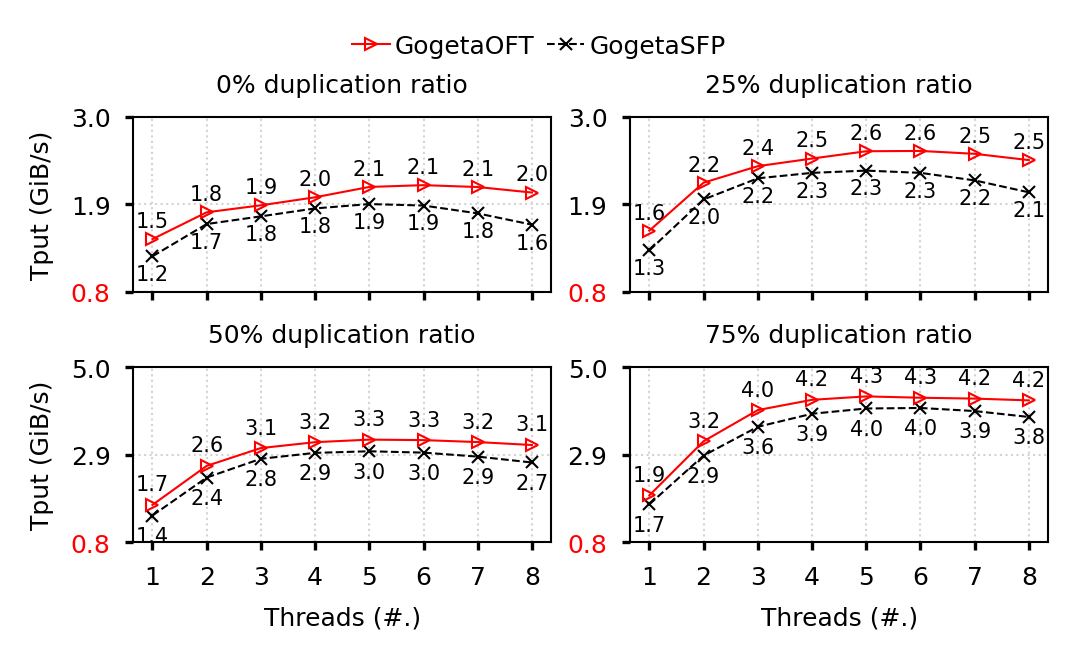

In [6]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
# matplotlib style settings
plt.rcParams.update(plt.rcParamsDefault)
matplotlib.rcParams['text.usetex'] = False
%matplotlib inline
style.use('grayscale')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["grid.color"] = "lightgray"
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-4K-all-dram", "r") as f:
    df_4K = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("./performance-comparison-table-continuous-all-dram", "r") as f:
    df_cont = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(5)))
fig.patch.set_facecolor('white')
df = df_4K
# df.drop(df[df['file_system'] == "PMM"].index, inplace=True)
# Plotting Settings
line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"]
# subtitles = ["(a) SW", "(b) RW", "(c) SR", "(d) RR", "(e) Strict-SW", "(f) Strict-RW"]
fss = ["Light-Dedup-J-64bits", "Light-Dedup-J-Super"]
dup_rates = [0, 25, 50, 75]
jobs = [1, 2, 3 ,4 , 5, 6 ,7 ,8]

context = ""
axes = []
lines = []
cmap = "tab10"

ylims = [
    [0.8, 3],
    [0.8, 3],
    [0.8, 5],
    [0.8, 5],
]

biases = [
    0.1,
    0.1,
    0.25,
    0.25,
]

for i in [0]:
    for dup_idx, dup_rate in enumerate(dup_rates):
        subfig = plt.subplot(2, 2, i * 2 + dup_idx + 1)
        df = df_cont
        # subfig = plt.subplot(gs0[op_idx])
        for idx, fs in enumerate(fss):
            # if fs == "":
            #     line = plt.plot(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024,  linewidth=line_width,label=fs, color="red", markerfacecolor="red", marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], zorder=10)
            # else:
            if fs == "NOVA-Improve":
                line = plt.plot(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024,  linewidth=line_width,label=fs, color="green", markerfacecolor="none", marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], zorder=10)
            elif fs == "Light-Dedup-J-64bits":
                line = plt.plot(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024,  linewidth=line_width,label=fs, color="red", markerfacecolor="none", marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], zorder=10)
            else:
                line = plt.plot(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024,  linewidth=line_width,label=fs, markerfacecolor="none", marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx])
            
            bias = biases[i * 2 + dup_idx]
            if dup_idx == 0: 
                if idx == 0:
                    for x, y in zip(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024):
                        plt.text(x, y+bias, f"{y:.1f}", ha='center', va='bottom', fontsize=5)
                else:
                    for x, y in zip(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024):
                        plt.text(x, y-bias, f"{y:.1f}", ha='center', va='top', fontsize=5)
            else:
                if idx == 0:
                    for x, y in zip(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024):
                        plt.text(x, y+bias, f"{y:.1f}", ha='center', va='bottom', fontsize=5)
                else:
                    for x, y in zip(jobs, df[(df['file_system'] == fs) & (df['dup_rate'] == dup_rate)]['bandwidth(MiB/s)'] / 1024):
                        plt.text(x, y-bias, f"{y:.1f}", ha='center', va='top', fontsize=5)
                
            lines.append(line)
        ax = fig.gca()
        lw = 0.5
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(lw)
        plt.xticks(jobs, fontsize=6)
        subfig.set_title(f"{dup_rate}% duplication ratio", fontsize=6)
        if (i * 2 + dup_idx + 1) > 2:
            plt.xlabel("Threads (#.)", fontsize=6)
        else:
            plt.xticks(jobs, labels=[], fontsize=6)

            
        # axes.append(ax)

        if ((2 * i + dup_idx + 1) in [1, 3]):
            plt.ylabel('Tput (GiB/s)', fontsize=6)
        
        ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
        plt.ylim(ylims[2 * i + dup_idx])
        yticks = np.linspace(ylims[2 * i + dup_idx][0], ylims[2 * i + dup_idx][1], 3)
        if (ylims[2 * i + dup_idx][0] != 0):
            ax.get_yticklabels()[0].set_color("red")
        
        # if (ylims[5 * i + dup_idx][0] != 0):
        plt.yticks(yticks, fontsize=6)
        plt.tick_params(axis='both', which='major', length=2) 
        
fss = pd.Series(fss)
fss.replace("Light-Dedup-J-64bits", "GogetaOFT", inplace=True)
fss.replace("Light-Dedup-J-Super", "GogetaSFP", inplace=True)
fss.replace("Light-Dedup-Improve", "Light-Dedup", inplace=True)
fss.replace("NOVA-Improve", "NOVA", inplace=True)
# "Light-Dedup-J-64bits", "Light-Dedup-J-Log", "Light-Dedup-Improve", "NV-Dedup", "DeNOVA", "NOVA-Improve"

handles, labels = ax.get_legend_handles_labels()

# steps = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
# cols = [2, 2, 2, 2, 1, 0, 0, 0, 0, 0]
# for ax_id, ax in enumerate(fig.axes):
#     if steps[ax_id] == 0:
#         continue
#     start = sum(steps[:ax_id])
#     end = start + steps[ax_id]
    
#     leg = ax.legend(handles[start : end], fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=cols[ax_id], fontsize=5, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
fig.legend(handles, fss, loc='upper center', bbox_to_anchor=(0,0,1,1.05), ncol=4, fontsize=6, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

# ax.legend(handles, fss, loc='upper center', bbox_to_anchor=(0,0,1,1), ncol=6, fontsize=5, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=6)
plt.tight_layout(pad=0.4)
# adjust_explanation(fig, axes, context, [1, 1, 1, 1, 0, 0])
# gs0.tight_layout(fig)
plt.savefig("./FIG-IO-SFPvsOET.pdf", bbox_inches='tight', pad_inches=0)
